In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-metabric/Breast Cancer METABRIC.csv


In [2]:
df_metabric = pd.read_csv('../input/breast-cancer-metabric/Breast Cancer METABRIC.csv')

print(f'METABRIC Dataset Shape: {df_metabric.shape}')

METABRIC Dataset Shape: (2509, 34)


In [3]:
df_metabric.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


## EDA

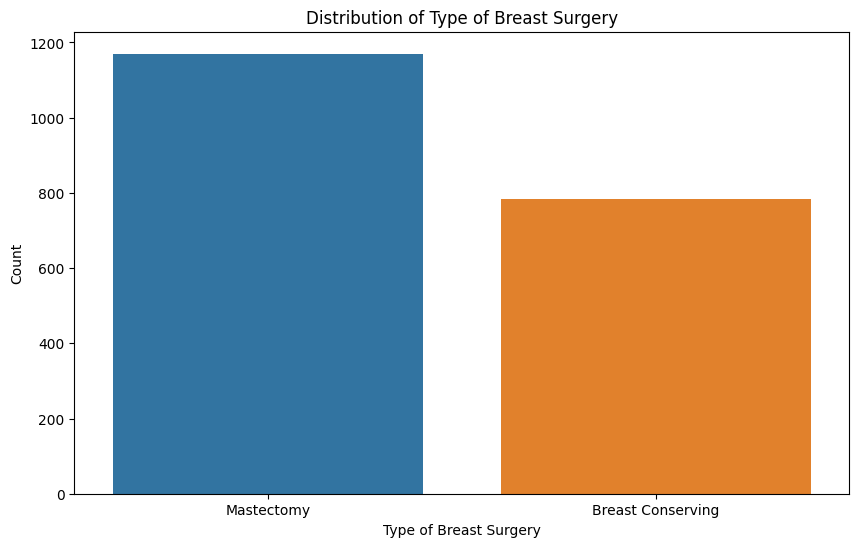

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of Type of Breast Surgery
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Breast Surgery', 
              data=df_metabric)
plt.title('Distribution of Type of Breast Surgery')
plt.xlabel('Type of Breast Surgery')
plt.ylabel('Count')
plt.show()

In [5]:
df_metabric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [6]:
df_metabric.isnull().sum()

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

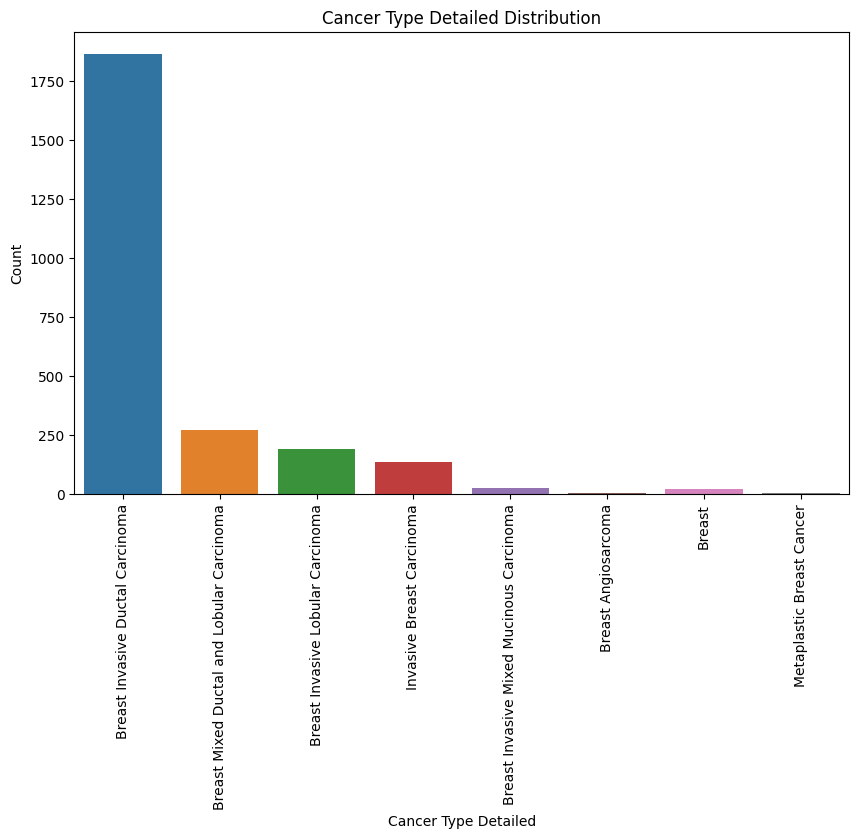

In [7]:
# Plotting the distribution of Cancer Type Detailed
plt.figure(figsize=(10, 6))
sns.countplot(x='Cancer Type Detailed', 
              data=df_metabric)
plt.title('Cancer Type Detailed Distribution')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [8]:
df_metabric['Cancer Type'].value_counts()

Cancer Type
Breast Cancer     2506
Breast Sarcoma       3
Name: count, dtype: int64

There are 2,506 breast cancer and 3 breast sarcoma patients in the dataset since breast sarcomas are very rare form of breast cancer, that cover fewer than 1% of all breast cancers.

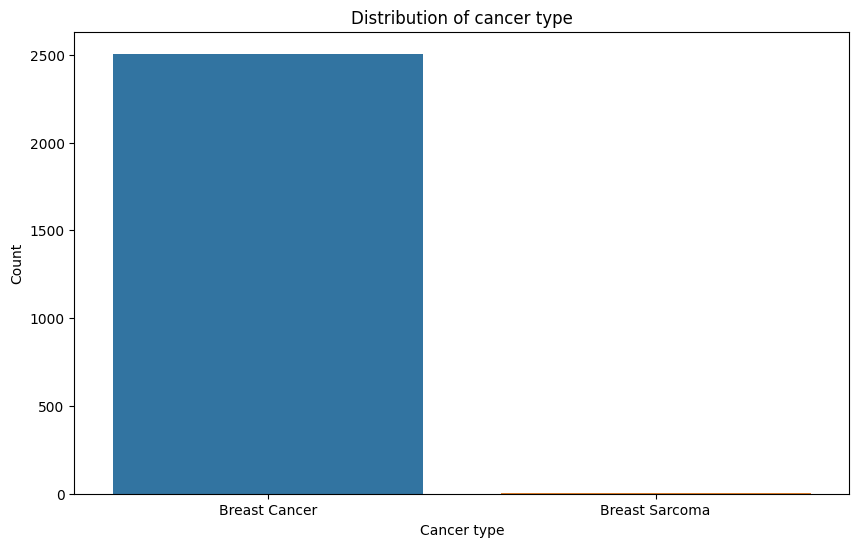

In [9]:
# Plotting the distribution of cancer type
plt.figure(figsize=(10, 6))
sns.countplot(x='Cancer Type', 
              data=df_metabric)
plt.title('Distribution of cancer type')
plt.xlabel('Cancer type')
plt.ylabel('Count')
plt.show()

In [10]:
df_metabric['Cancer Type Detailed'].value_counts()

Cancer Type Detailed
Breast Invasive Ductal Carcinoma             1865
Breast Mixed Ductal and Lobular Carcinoma     269
Breast Invasive Lobular Carcinoma             192
Invasive Breast Carcinoma                     133
Breast Invasive Mixed Mucinous Carcinoma       25
Breast                                         21
Breast Angiosarcoma                             2
Metaplastic Breast Cancer                       2
Name: count, dtype: int64

The most common histological subtype of the breast cancer is Invasive Ductal Carcinoma (IDC) with 1,865 occurences. IDC is the most common found of breast cancer, representing 80% of all breast cancer diagnoses. Those indicators show that this dataset reflects real world scenarios very accurately.

In [11]:
df_metabric['Type of Breast Surgery'].value_counts()

Type of Breast Surgery
Mastectomy           1170
Breast Conserving     785
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


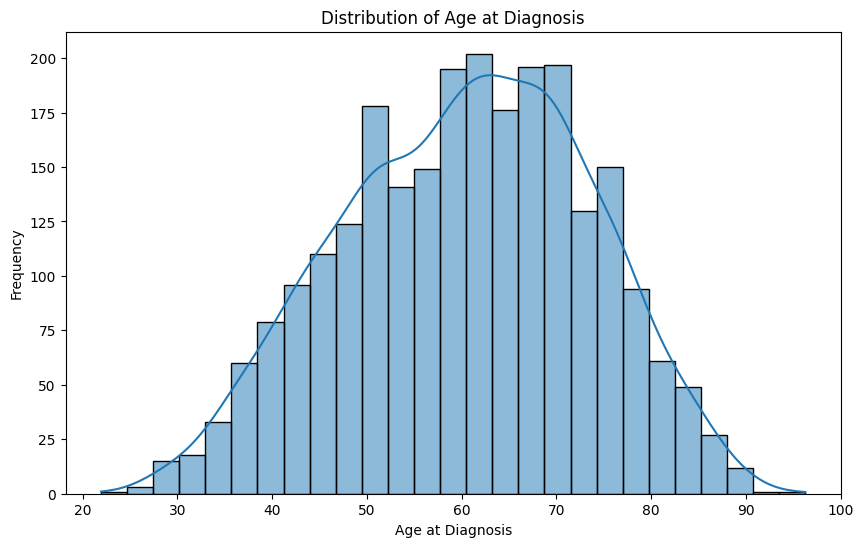

In [12]:
# Age at diagnosis distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_metabric['Age at Diagnosis'], 
             kde=True)
plt.title('Distribution of Age at Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')
plt.show()

There are two events within this dataset. Those events are survival (`Overall Survival Status`) and relapse (`Relapse Free Status`). There are also two durations associated with those events which are `Overall Survival (Months)` and `Relapse Free Status (Months)`. 

Survival analysis is based on those two events and their durations. Both of the durations follow very similar distributions, but distribution of events are slightly different. For survival event, "Deceased" label is more common that corresponds to event happened, but in relapse event "Not Recurred" label is more common and that corresponds to event didn't happen.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


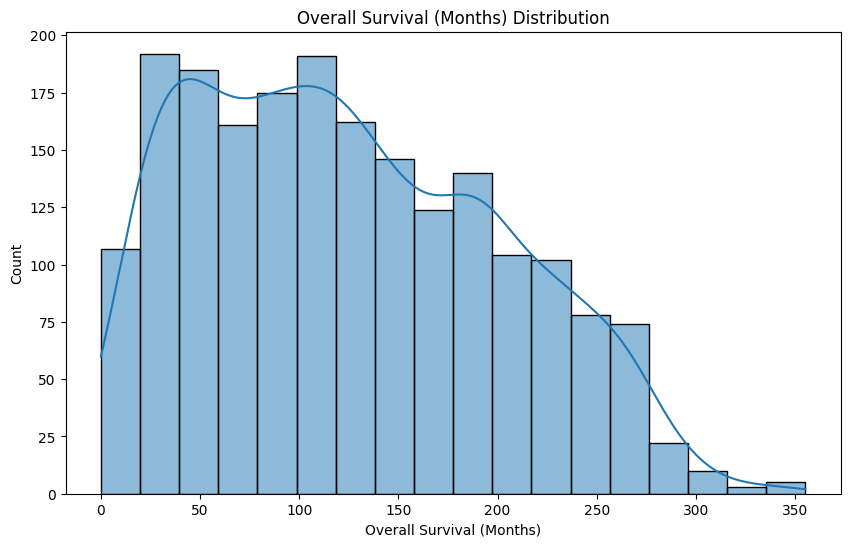

In [13]:
# Overall survival (months) distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_metabric['Overall Survival (Months)'], 
             kde=True)
plt.title('Overall Survival (Months) Distribution')
#plt.xlabel('Age at Diagnosis')
#plt.ylabel('Frequency')
plt.show()

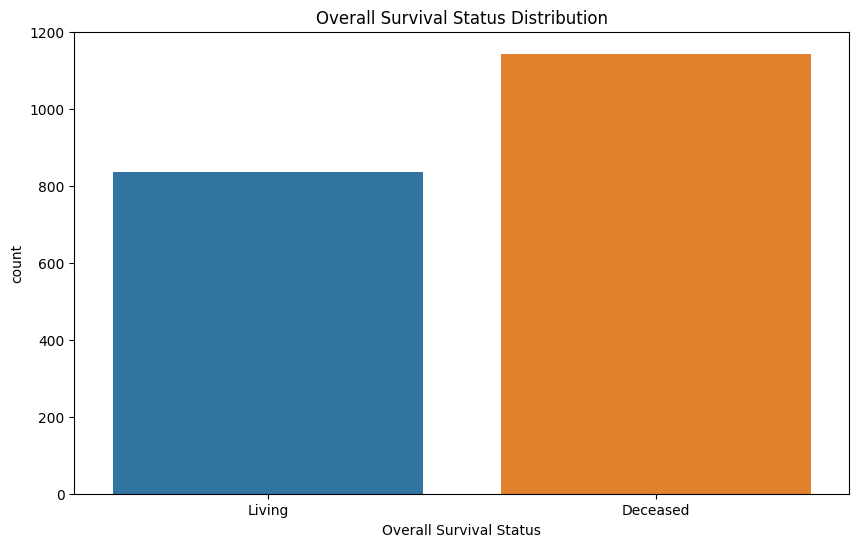

In [14]:
# Overall survival status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Overall Survival Status', 
              data=df_metabric)
plt.title('Overall Survival Status Distribution')
#plt.xlabel('Cancer type')
#plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


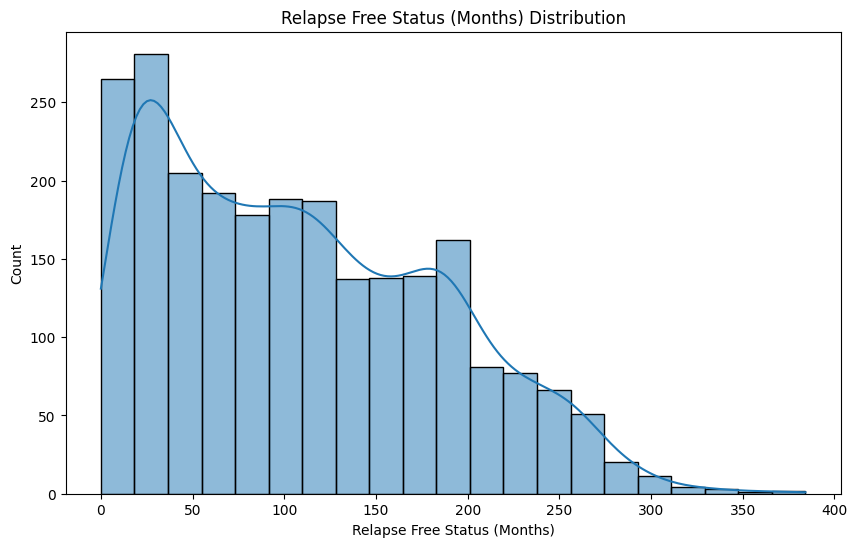

In [15]:
# Overall repalse (months) distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_metabric['Relapse Free Status (Months)'], 
             kde=True)
plt.title('Relapse Free Status (Months) Distribution')
#plt.xlabel('Age at Diagnosis')
#plt.ylabel('Frequency')
plt.show()

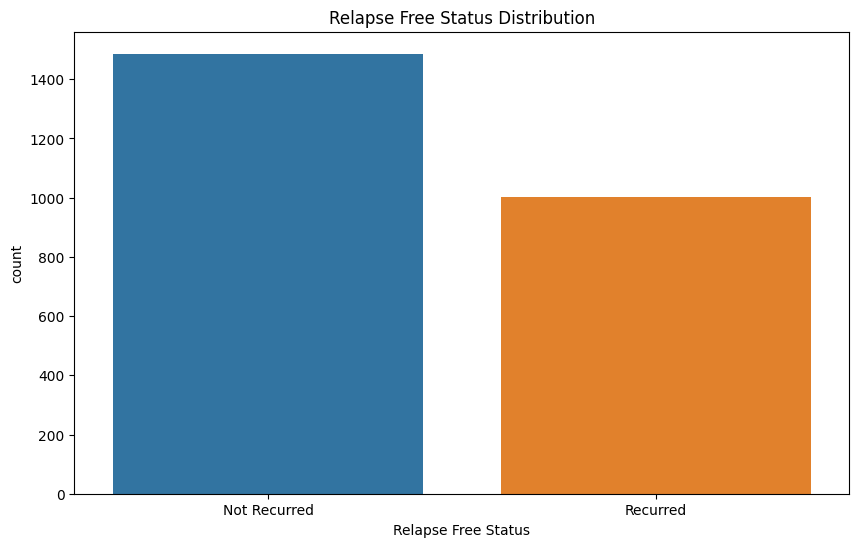

In [16]:
# Overall relapse status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Relapse Free Status', 
              data=df_metabric)
plt.title('Relapse Free Status Distribution')
#plt.xlabel('Cancer type')
#plt.ylabel('Count')
plt.show()

### Pre-processing and Cleaning

There are a total of 29 columns with missing values. The columns Patient ID, Oncotree Code, Cancer Type, Cancer Type Detailed, and Sex do not have any null values present.

Cancer Type and Cancer Type Detailed can be very useful for imputation.

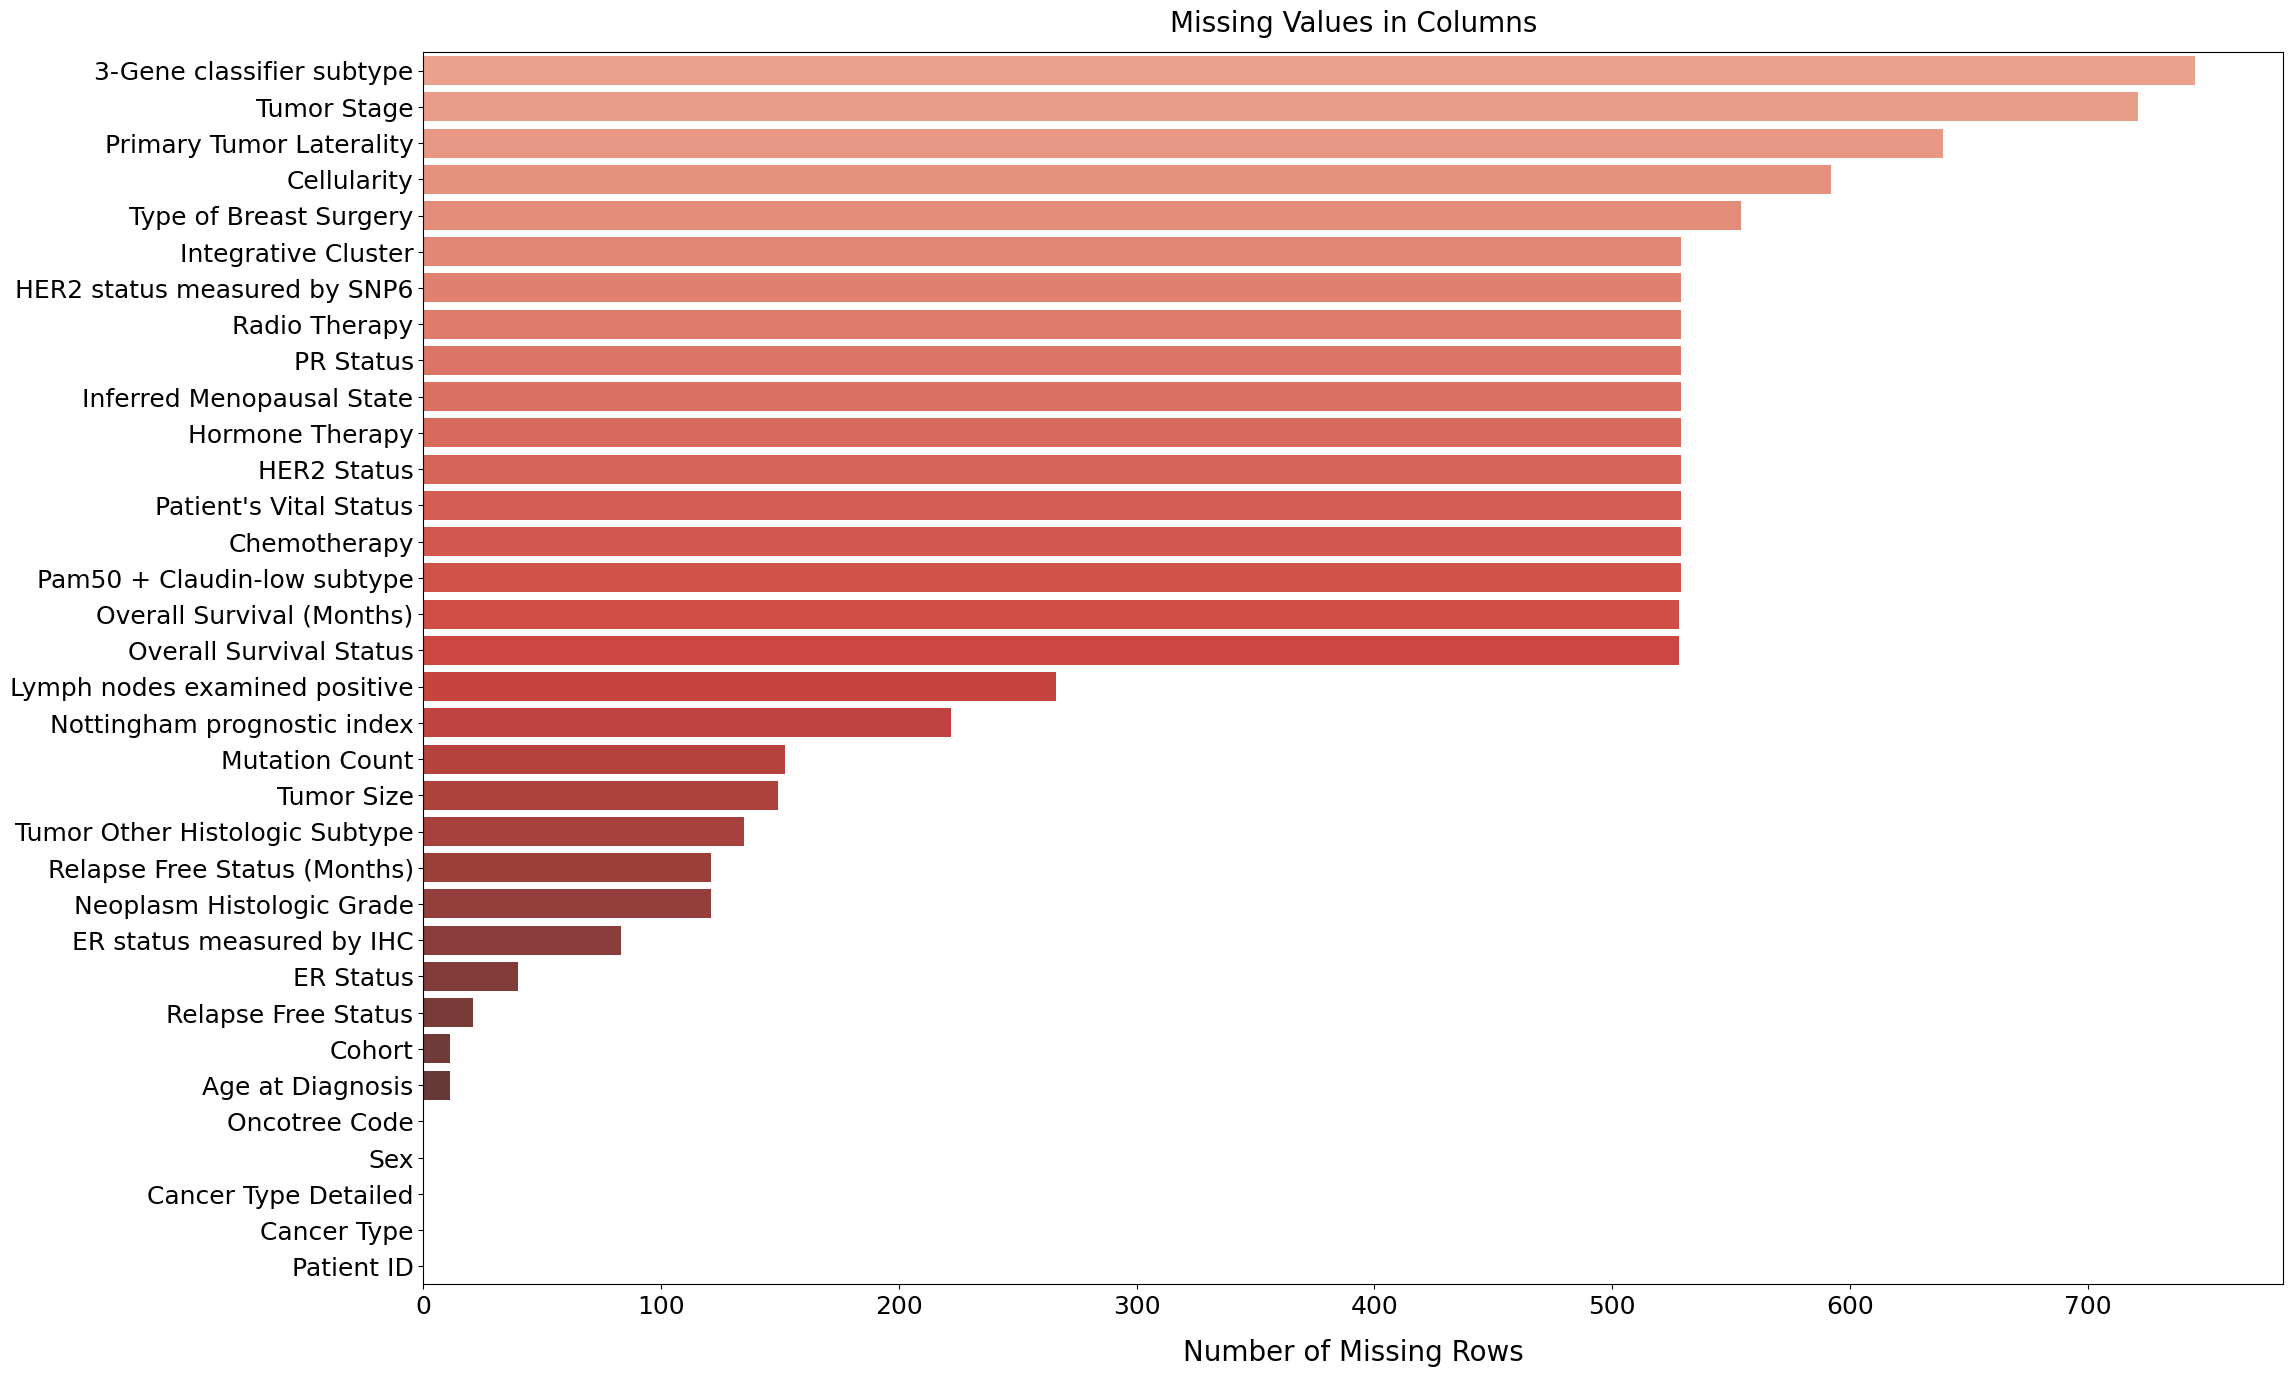

In [17]:
fig = plt.figure(figsize=(24, 16))

sns.barplot(x=df_metabric.isnull().sum().sort_values(ascending=False).values,
            y=df_metabric.isnull().sum().sort_values(ascending=False).index,
            palette='Reds_d')

plt.xlabel('Number of Missing Rows', size=20, labelpad=15)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Missing Values in Columns', size=20, pad=15)

plt.show()

Dependencies between different columns are exploited during the imputation stage. Missing values in event columns are filled with their most common value and missing values in duration columns are filled with most common values of Cancer Type Detailed, Event groups. Missing values in ER, PR and HER2 Status columns are filled with the most common values of their measurement technique columns (ER status measured by IHC and HER2 status measured by SNP6). Missing values in Chemotherapy, Hormone therapy, and Radio therapy are filled with the most common values in Cancer Type Detailed groups. Missing values in other columns are filled with modes or medians of different groups based on their dependencies. Some of the columns couldn't be filled with one operation so they are filled iteratively. Finally, Patient's Vital Status column is dropped because it doesn't yield any extra information for the analysis.

In [18]:
# Define a helper function to fill missing values with mode
def fillna_with_mode(series):
    mode_value = series.mode()[0] if not series.mode().empty else np.nan
    return series.fillna(mode_value)

# Fill missing values for Event and Duration columns
df_metabric['Relapse Free Status'] = df_metabric.groupby(['Cancer Type Detailed'])['Relapse Free Status'].apply(fillna_with_mode).reset_index(drop=True)
df_metabric['Relapse Free Status (Months)'] = df_metabric.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Relapse Free Status (Months)'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df_metabric['Overall Survival Status'] = df_metabric.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Overall Survival Status'].apply(fillna_with_mode).reset_index(drop=True)
df_metabric['Overall Survival (Months)'] = df_metabric.groupby(['Cancer Type Detailed', 'Overall Survival Status'])['Overall Survival (Months)'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)

# Fill missing values for ER, PR, HER2 status columns
df_metabric['ER status measured by IHC'] = df_metabric['ER status measured by IHC'].fillna(df_metabric['ER status measured by IHC'].mode()[0])
df_metabric['ER Status'] = df_metabric.groupby(['ER status measured by IHC'])['ER Status'].apply(fillna_with_mode).reset_index(drop=True)
df_metabric['HER2 status measured by SNP6'] = df_metabric['HER2 status measured by SNP6'].fillna(df_metabric['HER2 status measured by SNP6'].mode()[0])
df_metabric['HER2 Status'] = df_metabric.groupby(['HER2 status measured by SNP6'])['HER2 Status'].apply(fillna_with_mode).reset_index(drop=True)
df_metabric['PR Status'] = df_metabric.groupby(['Cancer Type Detailed'])['PR Status'].apply(fillna_with_mode).reset_index(drop=True)

# Fill missing values for Chemotherapy, Hormone Therapy, Radio Therapy columns
df_metabric['Chemotherapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Chemotherapy'].apply(fillna_with_mode).reset_index(drop=True)
df_metabric['Hormone Therapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Hormone Therapy'].apply(fillna_with_mode).reset_index(drop=True)
df_metabric['Radio Therapy'] = df_metabric.groupby(['Cancer Type Detailed'])['Radio Therapy'].apply(fillna_with_mode).reset_index(drop=True)

# Fill missing values for other columns
df_metabric['Age at Diagnosis'] = df_metabric.groupby(['Cancer Type Detailed'])['Age at Diagnosis'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df_metabric['Cohort'] = df_metabric.groupby(['Cancer Type Detailed'])['Cohort'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)
df_metabric['Cellularity'] = df_metabric.groupby(['Cancer Type Detailed'])['Cellularity'].apply(fillna_with_mode).reset_index(drop=True)
df_metabric['Tumor Stage'] = df_metabric.groupby(['Cancer Type Detailed', 'Cellularity'])['Tumor Stage'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)
df_metabric['Tumor Stage'] = df_metabric.groupby(['Cancer Type Detailed'])['Tumor Stage'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)
df_metabric['Tumor Size'] = df_metabric.groupby(['Cancer Type Detailed', 'Tumor Stage'])['Tumor Size'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)
df_metabric['Tumor Size'] = df_metabric.groupby(['Cancer Type Detailed'])['Tumor Size'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)
df_metabric['Tumor Size'] = df_metabric['Tumor Size'].fillna(df_metabric['Tumor Size'].mode()[0])
df_metabric['Neoplasm Histologic Grade'] = df_metabric.groupby(['Cancer Type Detailed'])['Neoplasm Histologic Grade'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)).reset_index(drop=True)
df_metabric['Primary Tumor Laterality'] = df_metabric.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)).reset_index(drop=True)
df_metabric['Tumor Other Histologic Subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['Tumor Other Histologic Subtype'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)).reset_index(drop=True)
df_metabric['Tumor Other Histologic Subtype'] = df_metabric['Tumor Other Histologic Subtype'].fillna('Ductal/NST')
df_metabric['Mutation Count'] = df_metabric.groupby(['Cancer Type Detailed'])['Mutation Count'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)).reset_index(drop=True)
df_metabric['Nottingham prognostic index'] = df_metabric.groupby(['Tumor Size'])['Nottingham prognostic index'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)
df_metabric['Nottingham prognostic index'] = df_metabric['Nottingham prognostic index'].fillna(df_metabric['Nottingham prognostic index'].median())
df_metabric['Lymph nodes examined positive'] = df_metabric.groupby(['Cancer Type Detailed'])['Lymph nodes examined positive'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)).reset_index(drop=True)
df_metabric['Inferred Menopausal State'] = df_metabric['Inferred Menopausal State'].fillna(df_metabric['Inferred Menopausal State'].mode()[0])
df_metabric['Pam50 + Claudin-low subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['Pam50 + Claudin-low subtype'].apply(fillna_with_mode).reset_index(drop=True)
df_metabric['Integrative Cluster'] = df_metabric.groupby(['Cancer Type Detailed'])['Cellularity'].apply(fillna_with_mode).reset_index(drop=True)
df_metabric['Type of Breast Surgery'] = df_metabric.groupby(['Cancer Type Detailed'])['Type of Breast Surgery'].apply(fillna_with_mode).reset_index(drop=True)
df_metabric['Primary Tumor Laterality'] = df_metabric.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].apply(fillna_with_mode).reset_index(drop=True)
df_metabric['3-Gene classifier subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['3-Gene classifier subtype'].apply(fillna_with_mode).reset_index(drop=True)

df_metabric.drop(columns=["Patient's Vital Status"], inplace=True)

/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_18/644571489.py:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_metabric['Tumor Other Histologic Subtype'] = df_metabric.groupby(['Cancer Type Detailed'])['Tumor Other Histologic Subtype'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)).res

### Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each categorical column separately
df_metabric['Type of Breast Surgery'] = np.uint8(le.fit_transform(df_metabric['Type of Breast Surgery']))
df_metabric['Cancer Type'] = np.uint8(le.fit_transform(df_metabric['Cancer Type']))
df_metabric['Cancer Type Detailed'] = np.uint8(le.fit_transform(df_metabric['Cancer Type Detailed']))
df_metabric['Cellularity'] = np.uint8(le.fit_transform(df_metabric['Cellularity']))
df_metabric['Chemotherapy'] = np.uint8(le.fit_transform(df_metabric['Chemotherapy']))
df_metabric['Pam50 + Claudin-low subtype'] = np.uint8(le.fit_transform(df_metabric['Pam50 + Claudin-low subtype']))
df_metabric['ER status measured by IHC'] = np.uint8(le.fit_transform(df_metabric['ER status measured by IHC']))
df_metabric['ER Status'] = np.uint8(le.fit_transform(df_metabric['ER Status']))
df_metabric['HER2 status measured by SNP6'] = np.uint8(le.fit_transform(df_metabric['HER2 status measured by SNP6']))
df_metabric['HER2 Status'] = np.uint8(le.fit_transform(df_metabric['HER2 Status']))
df_metabric['Tumor Other Histologic Subtype'] = np.uint8(le.fit_transform(df_metabric['Tumor Other Histologic Subtype']))
df_metabric['Hormone Therapy'] = np.uint8(le.fit_transform(df_metabric['Hormone Therapy']))
df_metabric['Inferred Menopausal State'] = np.uint8(le.fit_transform(df_metabric['Inferred Menopausal State']))
df_metabric['Integrative Cluster'] = np.uint8(le.fit_transform(df_metabric['Integrative Cluster']))
df_metabric['Primary Tumor Laterality'] = np.uint8(le.fit_transform(df_metabric['Primary Tumor Laterality']))
df_metabric['Oncotree Code'] = np.uint8(le.fit_transform(df_metabric['Oncotree Code']))
df_metabric['PR Status'] = np.uint8(le.fit_transform(df_metabric['PR Status']))
df_metabric['Radio Therapy'] = np.uint8(le.fit_transform(df_metabric['Radio Therapy']))
df_metabric['Sex'] = np.uint8(le.fit_transform(df_metabric['Sex']))
df_metabric['3-Gene classifier subtype'] = np.uint8(le.fit_transform(df_metabric['3-Gene classifier subtype']))

# Manual Encoding of Binary Columns
df_metabric['Overall Survival Status'] = np.uint8(df_metabric['Overall Survival Status'].map({'Living': 0, 'Deceased': 1}))
df_metabric['Relapse Free Status'] = np.uint8(df_metabric['Relapse Free Status'].map({'Not Recurred': 0, 'Recurred': 1}))

# Display the dataframe
df_metabric.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage
0,MB-0000,51.21,1,0,2,1,0,2,1.0,1,...,48.800000,0,0,0,48.16,0,0,1,40.0,2.0
1,MB-0002,58.01,1,0,2,0,0,5,1.0,1,...,112.800000,0,0,0,111.32,0,0,2,10.0,3.0
2,MB-0005,60.20,1,0,2,2,1,6,1.0,1,...,243.900000,0,0,1,109.61,0,0,2,24.0,2.0
3,MB-0006,62.97,0,0,5,0,1,6,1.0,1,...,240.833333,0,0,1,161.61,0,0,2,21.0,2.0
4,MB-0008,69.73,1,0,5,2,0,5,1.0,1,...,278.366667,0,1,0,109.01,0,0,1,25.0,1.0


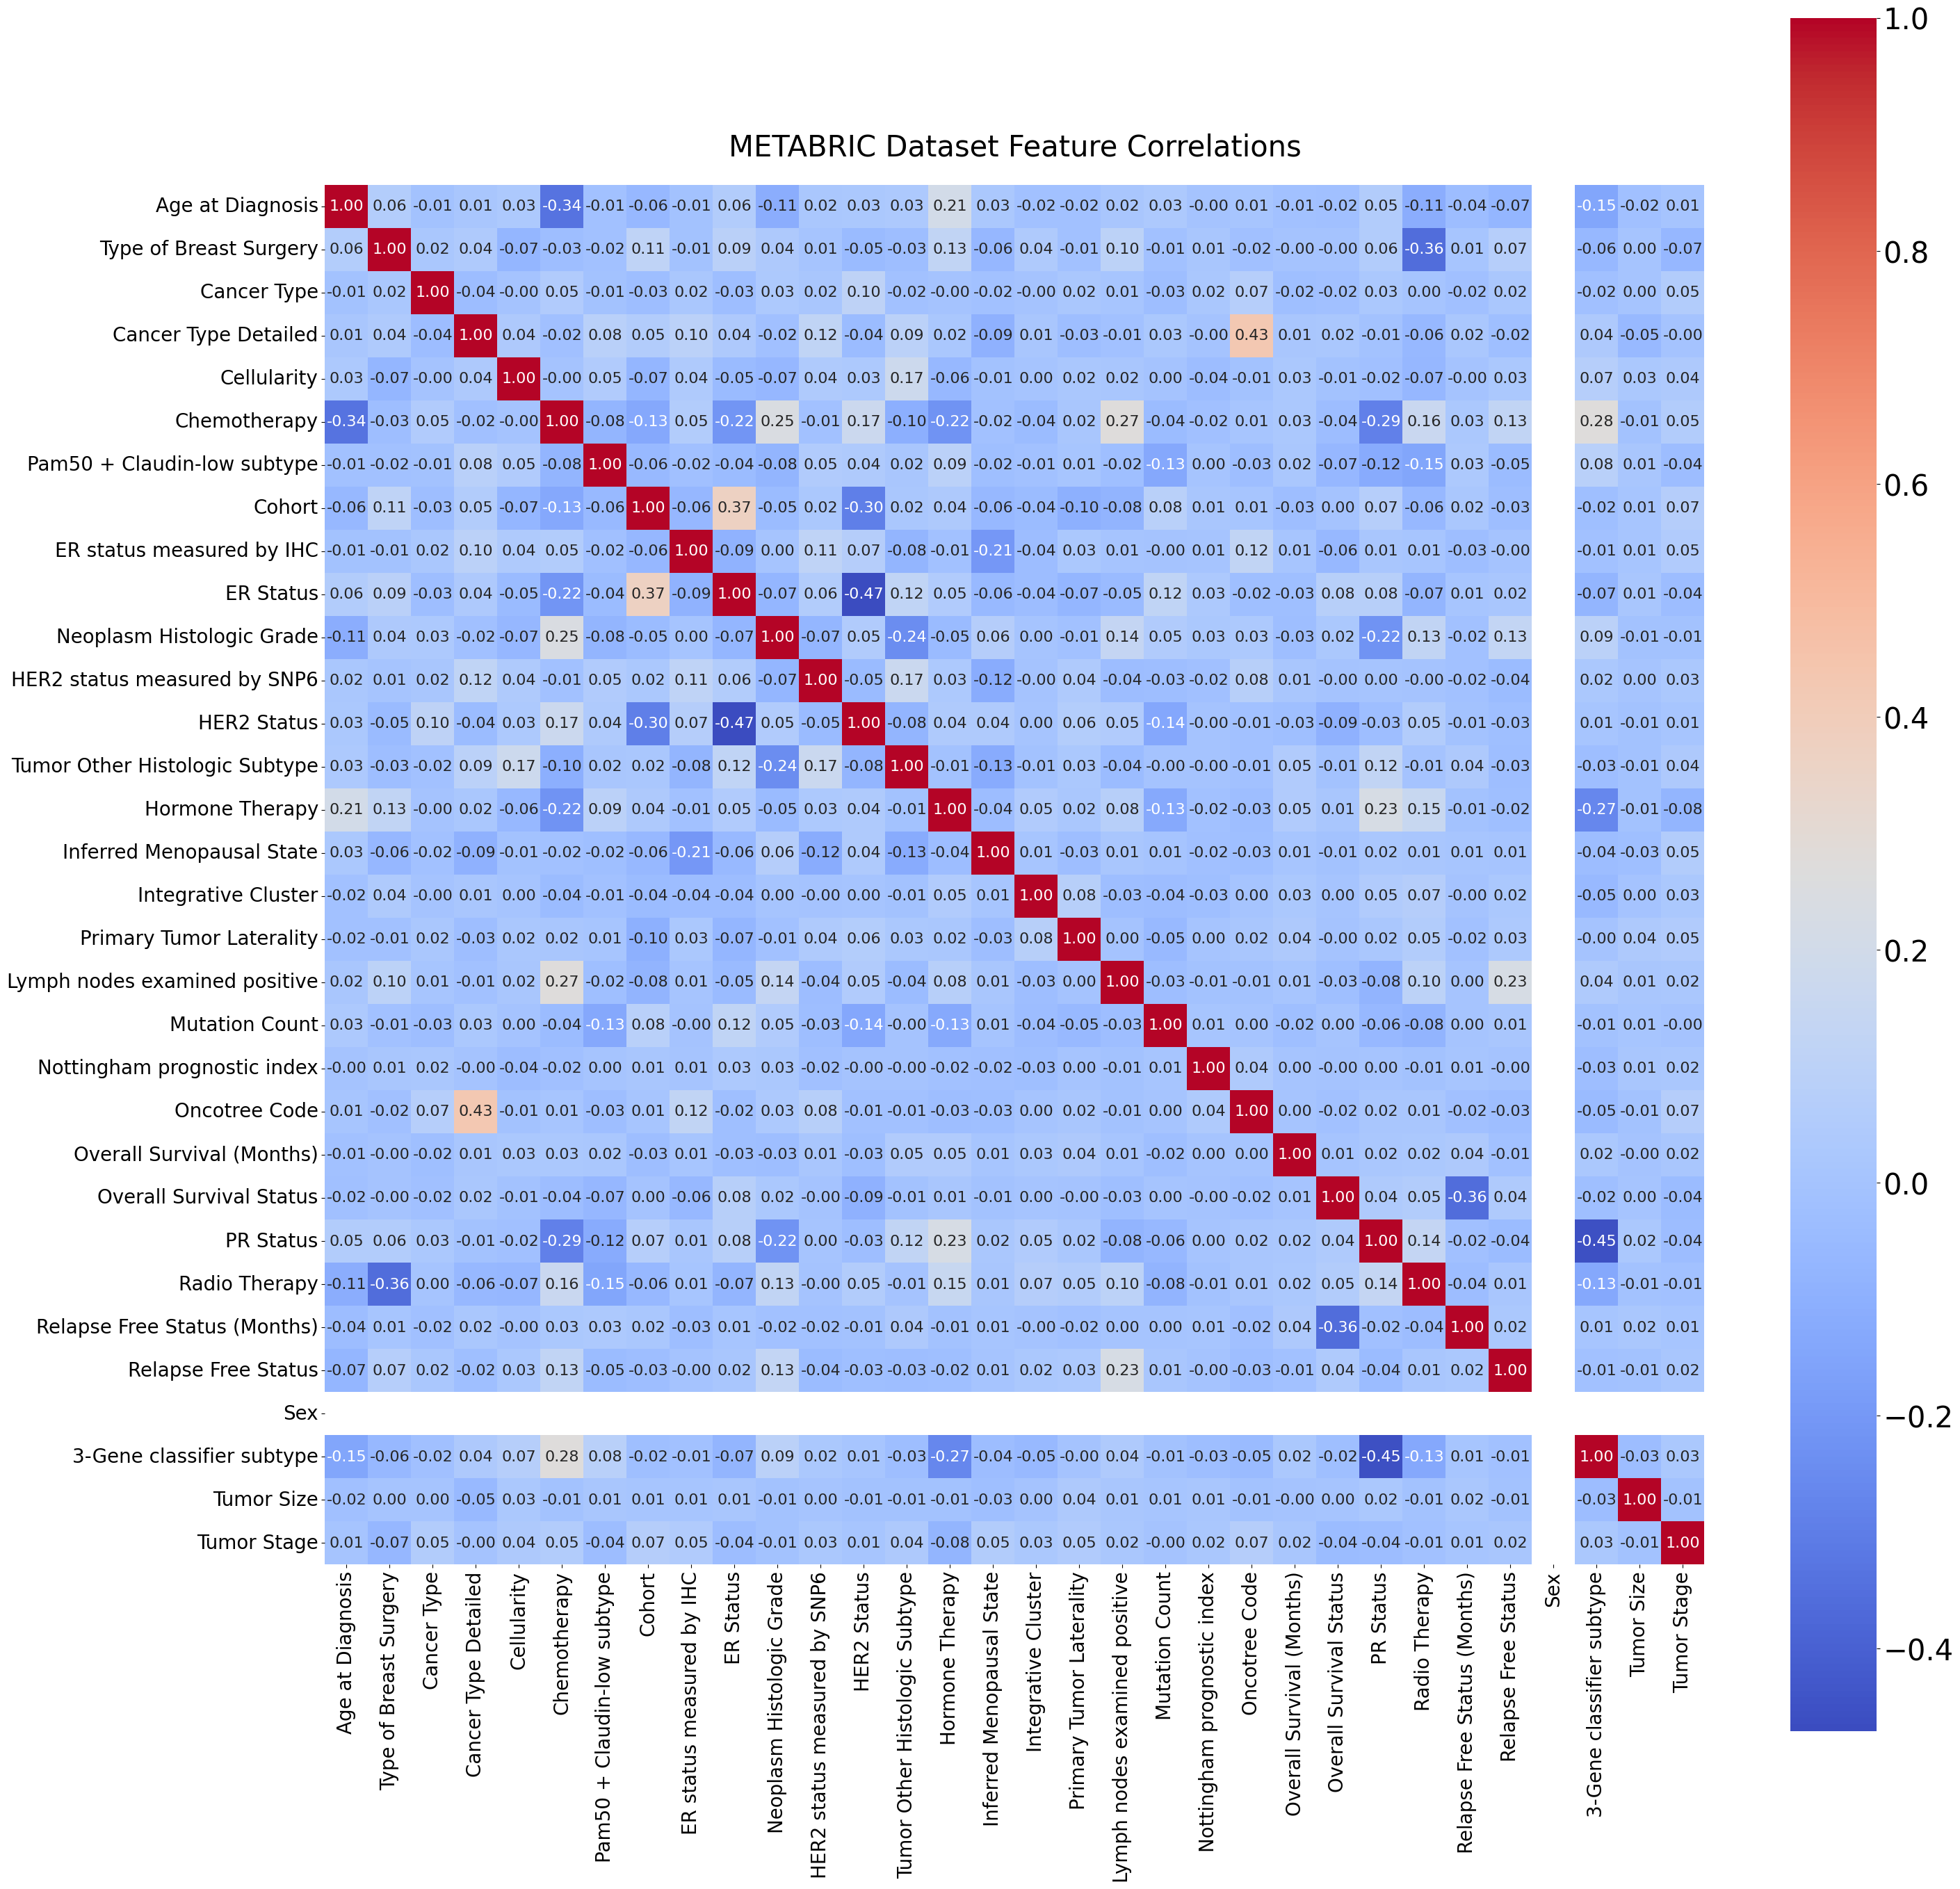

In [20]:
# Compute the correlation matrix excluding the Patient ID column
corr_matrix = df_metabric.drop(columns=['Patient ID']).corr()

# Plot the heatmap
fig = plt.figure(figsize=(32, 32), dpi=100)
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 square=True, 
                 cmap='coolwarm', 
                 annot_kws={'size': 16},  
                 fmt='.2f')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)

plt.tick_params(axis='x', labelsize=20, rotation=90)
plt.tick_params(axis='y', labelsize=20, rotation=0)

plt.title('METABRIC Dataset Feature Correlations', 
          size=30, pad=30)

plt.show()